# Massenspektrometrie

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import codecs
from scipy.signal import find_peaks

plt.rc('font', size=11)

In [72]:
class MassSpek():
    def __init__(self,path,ind,skip_header=14):
        '''Übergebe Indize für den ersten Wert des Datensatzes, der genutzt werden soll.
        Printe die erste und letzte Masse des Arrays, um zu sehen, ob genau ein 
        Durchlauf geladen wurde.'''
        self.ayuda = []
        ind = [ind,ind+1600]
        with codecs.open(path, encoding='utf-8-sig') as f:
            for line in f:
                if line[0] in [str(i) for i in range(0,10)]:
                    self.ayuda.append([float(x.replace(',','.')) for x in line.split()])
        self.ayuda = np.array(self.ayuda).T
        self.mass = self.ayuda[0][ind[0]:ind[1]]
        self.ion = self.ayuda[1][ind[0]:ind[1]]
        print('Erste und letzte geladene Masse: ',self.mass[0],self.mass[-1])

    def plot_spek(self,title,lower_ybound=1e-16,higher_ybound=1e-9):
        fig, ax = plt.subplots(figsize=(15,6))
        plt.title(title)
        ax.plot(self.mass,self.ion,c='firebrick')
        ax.fill_between(self.mass,self.ion,color='firebrick',alpha=0.5)
        ax.set_yscale('log')
        ax.set_xlabel('Masse/Ladung [amu/e]')
        ax.set_ylabel('Ionenstrom [A]')
        ax.set_xticks([i for i in range(51)])
        ax.set_ylim(lower_ybound,higher_ybound)
        ax.set_xlim(0,50)

    def peaks(self,heigth,width):
        peaks = find_peaks(self.ion,height=heigth,width=width)[0]
        print('Peaks: ',self.mass[peaks],self.ion[peaks])
        print('Relative Höhen: ',np.around(self.mass[peaks]),self.ion[peaks]/max(self.ion[peaks]))

Erste und letzte geladene Masse:  0.0 49.97
Peaks:  [ 1.16  2.03  3.72 11.97 16.03 16.94 18.   28.03 31.94 42.69 43.94 44.97] [5.637158e-13 2.075933e-12 4.533084e-14 4.680253e-14 6.119535e-14
 1.783172e-14 5.645833e-14 2.260454e-13 2.481628e-14 1.223860e-14
 7.824975e-14 1.257748e-14]
Relative Höhen:  [ 1.  2.  4. 12. 16. 17. 18. 28. 32. 43. 44. 45.] [0.27154817 1.         0.02183637 0.0225453  0.02947848 0.00858974
 0.02719661 0.10888858 0.01195428 0.00589547 0.03769377 0.00605871]


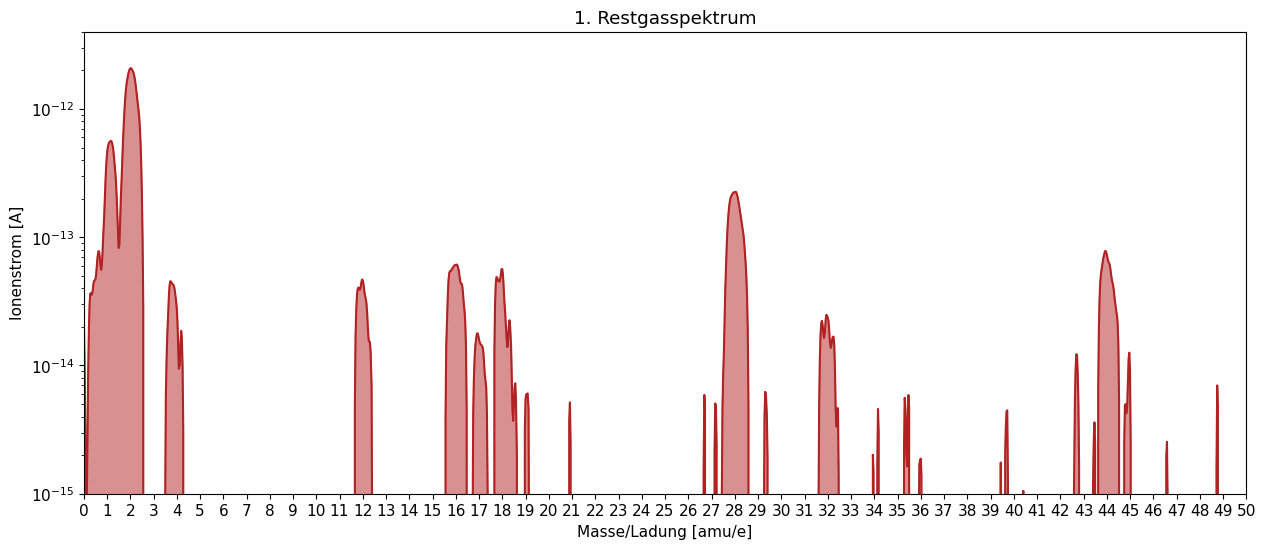

In [73]:
rest1 = MassSpek('data/massenspek/rest_1.asc',36800)    # 38400
rest1.plot_spek('1. Restgasspektrum',lower_ybound=1e-15,higher_ybound=4e-12)
rest1.peaks(1e-14,5)
plt.savefig('figures/massenspek/restgas1.pdf')

Erste und letzte geladene Masse:  0.0 49.97
Peaks:  [ 1.16  2.03  3.72 11.97 16.03 16.94 18.   28.03 31.94 43.94] [5.637158e-13 2.075933e-12 4.533084e-14 4.680253e-14 6.119535e-14
 1.783172e-14 5.645833e-14 2.260454e-13 2.481628e-14 7.824975e-14]
Relative Höhen:  [ 1.  2.  4. 12. 16. 17. 18. 28. 32. 44.] [0.27154817 1.         0.02183637 0.0225453  0.02947848 0.00858974
 0.02719661 0.10888858 0.01195428 0.03769377]


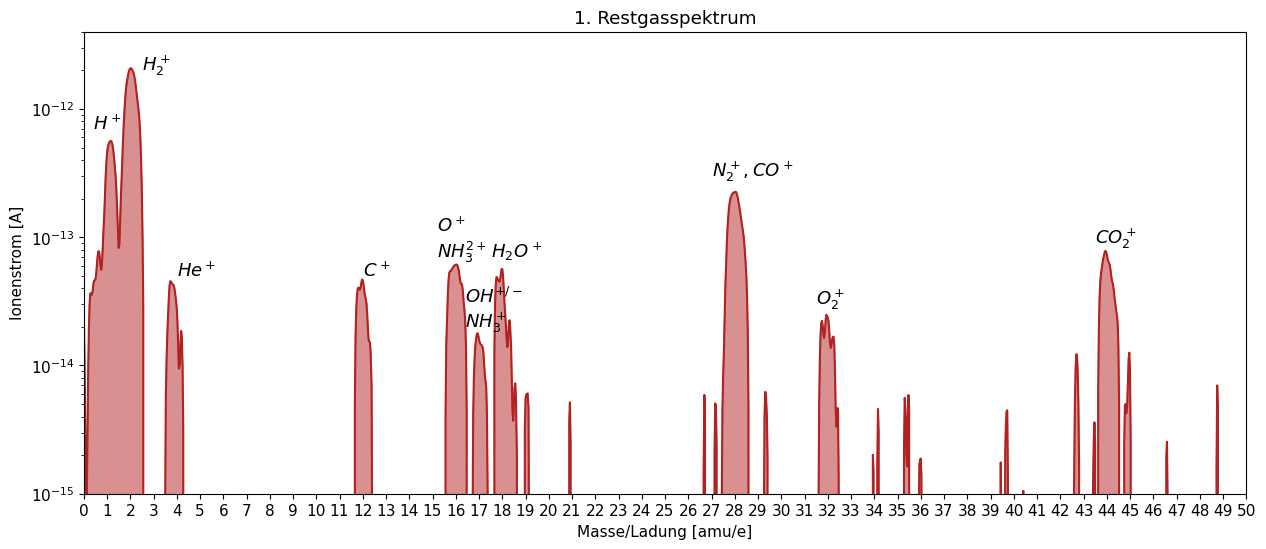

In [74]:
rest1label = MassSpek('data/massenspek/rest_1.asc',36800)    # 38400
rest1label.plot_spek('1. Restgasspektrum',lower_ybound=1e-15,higher_ybound=4e-12)
rest1label.peaks(1.5e-14,5)

plt.text(0.4,7e-13,r'$H^+$',fontsize=13)
plt.text(2.5,2e-12,r'$H_2^+$',fontsize=13)
plt.text(4.0,5e-14,r'$He^+$',fontsize=13)
plt.text(12.0,5e-14,r'$C^+$',fontsize=13)
plt.text(15.2,7e-14,'$O^+$\n$NH^{2+}_3$',fontsize=13)
plt.text(16.4,2e-14,'$OH^{+/-}$\n$NH^+_3$',fontsize=13)
plt.text(17.5,7e-14,r'$H_2O^+$',fontsize=13)
plt.text(27.0,3e-13,r'$N_2^+,CO^+$',fontsize=13)
plt.text(31.5,3e-14,r'$O_2^+$',fontsize=13)
plt.text(43.5,9e-14,r'$CO_2^+$',fontsize=13)

plt.savefig('figures/massenspek/restgas1_label.pdf')

Erste und letzte geladene Masse:  0.0 49.97
Peaks:  [ 1.16  2.03 27.91] [4.415500e-13 2.100105e-12 1.041607e-13]
Relative Höhen:  [ 1.  2. 28.] [0.21025139 1.         0.04959785]


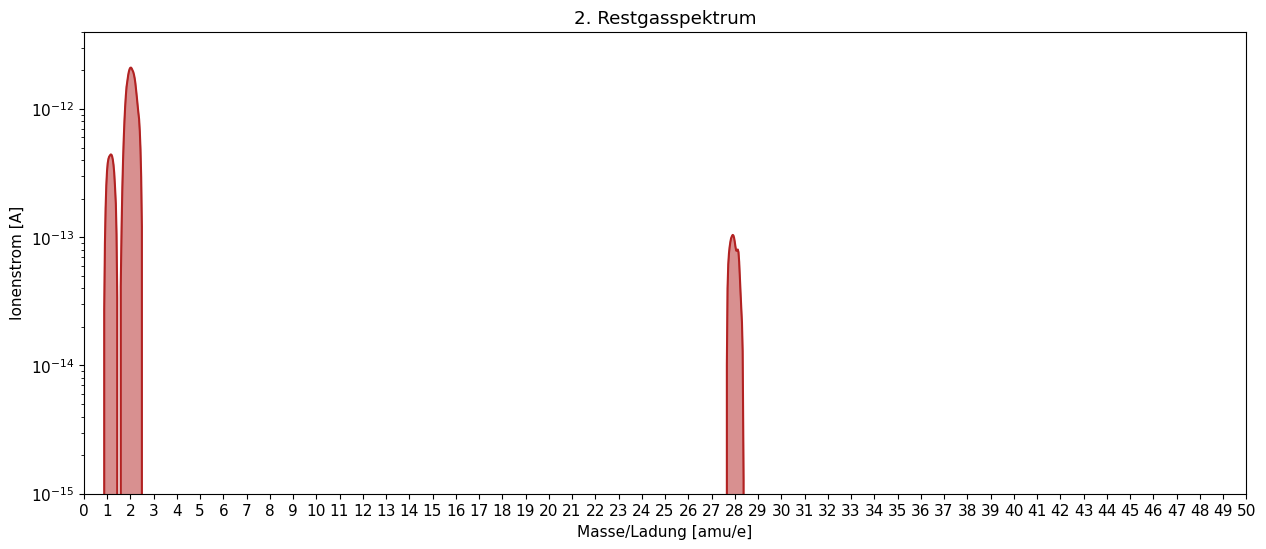

In [75]:
rest2 = MassSpek('data/massenspek/res_2.asc',37073)    # 38400
rest2.plot_spek('2. Restgasspektrum',lower_ybound=1e-15,higher_ybound=4e-12)
rest2.peaks(1e-14,5)
plt.savefig('figures/massenspek/restgas2.pdf')

Erste und letzte geladene Masse:  0.0 49.97
Peaks:  [ 1.19  2.06  3.88 11.88 13.91 15.91 16.97 17.94 19.88 27.91 28.94 29.94
 31.91 35.91 37.91 39.91 43.94] [5.245486e-13 1.300709e-11 1.459198e-11 2.769653e-13 5.059578e-12
 2.797192e-12 2.803910e-13 1.262361e-12 4.044073e-11 6.532525e-11
 3.972974e-13 4.233095e-13 1.928073e-11 1.155634e-12 1.380489e-13
 3.530073e-10 5.413215e-12]
Relative Höhen:  [ 1.  2.  4. 12. 14. 16. 17. 18. 20. 28. 29. 30. 32. 36. 38. 40. 44.] [1.48594264e-03 3.68465185e-02 4.13361990e-02 7.84588024e-04
 1.43327858e-02 7.92389279e-03 7.94292356e-04 3.57601953e-03
 1.14560605e-01 1.85053539e-01 1.12546511e-03 1.19915226e-03
 5.46185022e-02 3.27368301e-03 3.91065284e-04 1.00000000e+00
 1.53345696e-02]


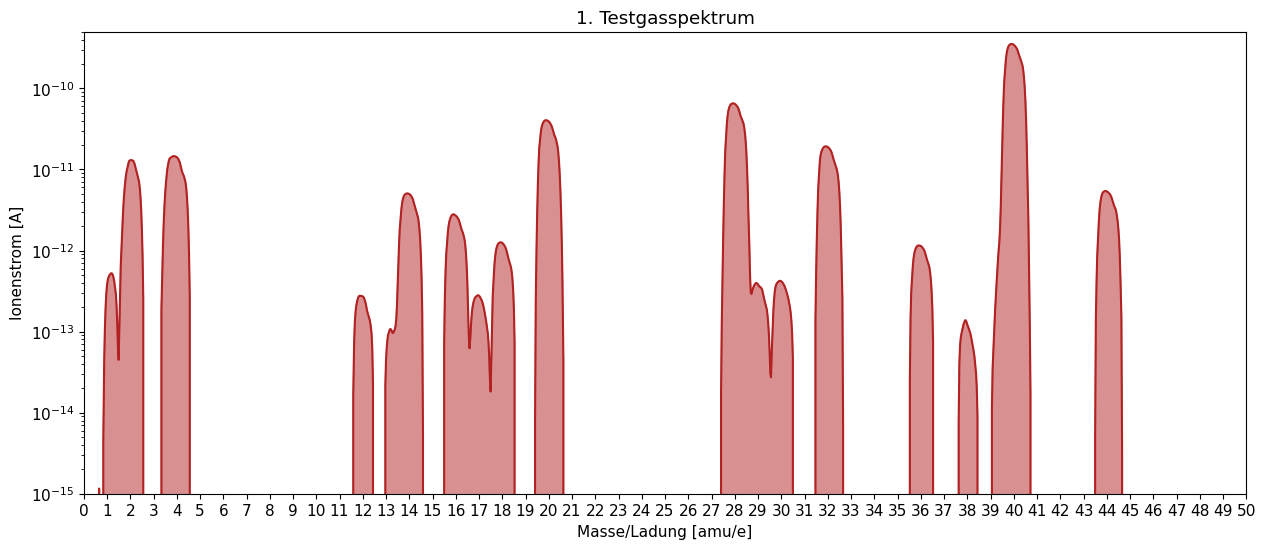

In [76]:
test1 = MassSpek('data/massenspek/test_1.asc',3200)    # 38400
test1.plot_spek('1. Testgasspektrum',lower_ybound=1e-15,higher_ybound=5e-10)
test1.peaks(1e-14,5)
plt.savefig('figures/massenspek/testgas1.pdf')

Erste und letzte geladene Masse:  0.0 49.97
Peaks:  [ 1.16  2.06  3.81 11.78 13.84 15.84 16.84 17.88 19.84 27.88 28.94 29.88
 31.88 35.88 37.94 39.88 43.88] [5.110121e-13 1.370833e-11 1.522984e-11 3.228955e-13 4.505309e-12
 2.691758e-12 2.833491e-13 1.213434e-12 4.192181e-11 5.703335e-11
 3.307923e-13 5.315396e-13 1.792836e-11 1.227872e-12 1.436868e-13
 3.741901e-10 5.818805e-12]
Relative Höhen:  [ 1.  2.  4. 12. 14. 16. 17. 18. 20. 28. 29. 30. 32. 36. 38. 40. 44.] [1.36564837e-03 3.66346678e-02 4.07008096e-02 8.62918340e-04
 1.20401609e-02 7.19355750e-03 7.57233021e-04 3.24282764e-03
 1.12033456e-01 1.52418116e-01 8.84022052e-04 1.42050685e-03
 4.79124381e-02 3.28141231e-03 3.83994125e-04 1.00000000e+00
 1.55503980e-02]


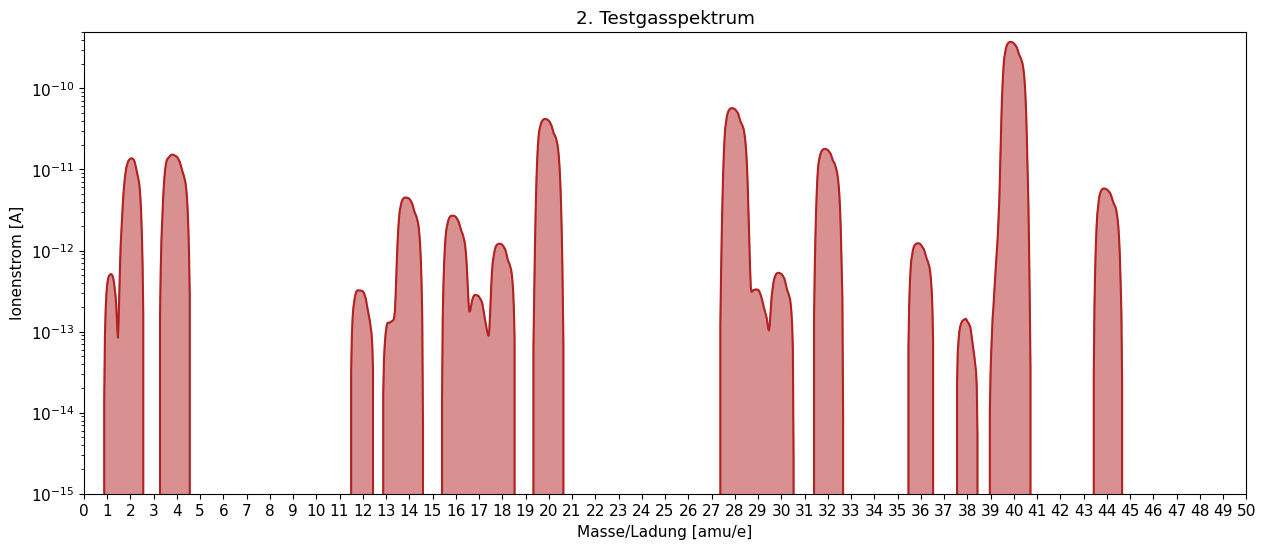

In [77]:
test2 = MassSpek('data/massenspek/test_2.asc',1600)    # 38400
test2.plot_spek('2. Testgasspektrum',lower_ybound=1e-15,higher_ybound=5e-10)
test2.peaks(1e-14,5)
plt.savefig('figures/massenspek/testgas2.pdf')